<a href="https://colab.research.google.com/github/Shashwot90/CV/blob/main/02_neural_network_classification_with_tensorflow_video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Introduction to neural network classification with TensorFlow

write neural networks for classification
* Binary classification
* Multiclass classification
* Multilabel classification

###CReating data to view and fit

In [ ]:
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [ ]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [ ]:
import pandas as pd
circles = pd.DataFrame({"X0": X[:, 0], "X1": X[:, 1], "label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


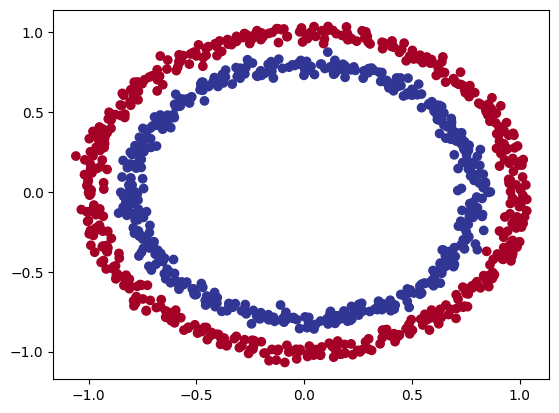

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

###Input and output shapes

In [ ]:
X.shape, y.shape


((1000, 2), (1000,))

In [ ]:
len(X), len(y)

(1000, 1000)

In [ ]:
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

###Steps in modelling

1. create model
2. compile
3. fit
4. evaluate
5. tweak
6. evaluate

In [ ]:
import tensorflow as tf
print(tf.__version__)

import datetime
print(f"Notebook last run (end-to-end): {datetime.datetime.now()}")

2.13.0
Notebook last run (end-to-end): 2023-10-22 13:32:43.768398


In [ ]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

model_1.fit(X, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 2ms/step - loss: 3.9304 - accuracy: 0.4760
Epoch 2/5
32/32 [==============================] - 0s 2ms/step - loss: 1.7437 - accuracy: 0.4860
Epoch 3/5
32/32 [==============================] - 0s 2ms/step - loss: 0.7331 - accuracy: 0.4880
Epoch 4/5
32/32 [==============================] - 0s 2ms/step - loss: 0.7056 - accuracy: 0.4950
Epoch 5/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6982 - accuracy: 0.4900


In [ ]:
model_1.fit(X, y, epochs=200, verbose=0)
model_1.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934831142425537, 0.5]

In [ ]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

model_2.fit(X, y, epochs=100, verbose=0)

In [ ]:
model_2.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6932 - accuracy: 0.5000


[0.693245530128479, 0.5]

###Improve Model

In [ ]:
circles["label"].value_counts()

1    500
0    500
Name: label, dtype: int64

In [ ]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_3.fit(X, y, epochs=100, verbose=0)

In [ ]:
model_3.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6972 - accuracy: 0.5020


[0.697185754776001, 0.5019999742507935]

In [ ]:
import numpy as np

In [ ]:
import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html

  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)

  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())


313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


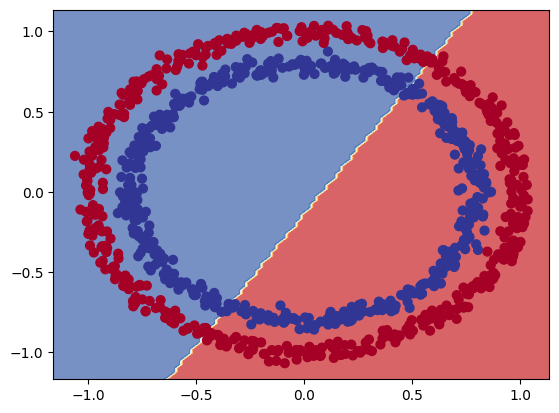

In [ ]:
plot_decision_boundary(model_3, X, y)

In [ ]:
tf.random.set_seed(42)

X_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5)

X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

#model_3.fit(X_reg_train, y_reg_train, epochs=100)

In [ ]:

# Setup random seed
tf.random.set_seed(42)

# Recreate the model
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# Change the loss and metrics of our compiled model
model_3.compile(loss=tf.keras.losses.mae, # change the loss function to be regression-specific
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae']) # change the metric to be regression-specific

# Fit the recompiled model
model_3.fit(tf.expand_dims(X_reg_train, axis=-1),
            y_reg_train,
            epochs=100)

Epoch 1/100
5/5 [==============================] - 1s 4ms/step - loss: 406.0513 - mae: 406.0513
Epoch 2/100
5/5 [==============================] - 0s 3ms/step - loss: 329.2590 - mae: 329.2590
Epoch 3/100
5/5 [==============================] - 0s 3ms/step - loss: 253.3683 - mae: 253.3683
Epoch 4/100
5/5 [==============================] - 0s 4ms/step - loss: 172.6008 - mae: 172.6008
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: 86.4664 - mae: 86.4664
Epoch 6/100
5/5 [==============================] - 0s 3ms/step - loss: 51.7477 - mae: 51.7477
Epoch 7/100
5/5 [==============================] - 0s 4ms/step - loss: 70.0040 - mae: 70.0040
Epoch 8/100
5/5 [==============================] - 0s 3ms/step - loss: 57.9207 - mae: 57.9207
Epoch 9/100
5/5 [==============================] - 0s 4ms/step - loss: 43.8829 - mae: 43.8829
Epoch 10/100
5/5 [==============================] - 0s 3ms/step - loss: 47.4493 - mae: 47.4493
Epoch 11/100
5/5 [==============================] -

2/2 [==============================] - 0s 3ms/step


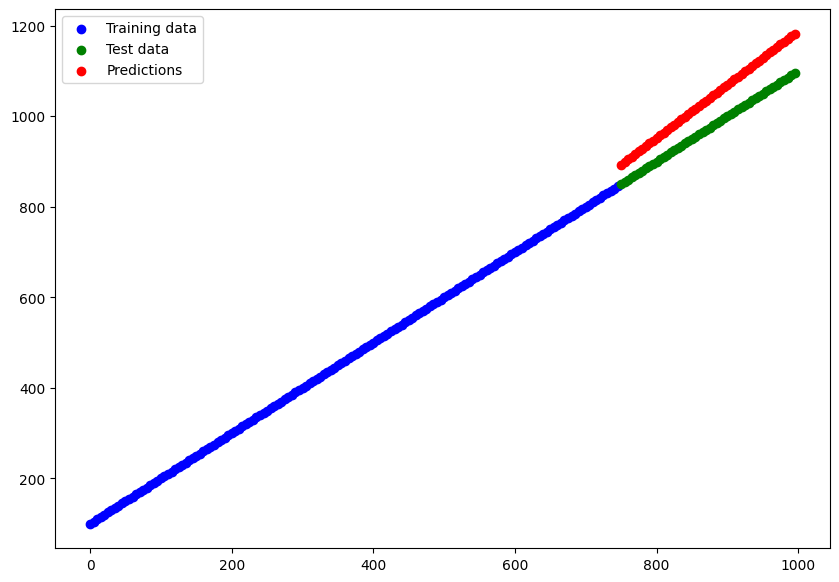

In [ ]:
y_reg_preds = model_3.predict(X_reg_test)

plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c="b", label="Training data")
plt.scatter(X_reg_test, y_reg_test, c="g", label="Test data")
plt.scatter(X_reg_test, y_reg_preds, c="r", label="Predictions")
plt.legend();

In [ ]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
  tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)
])

model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

history = model_4.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 6.3628 - accuracy: 0.4860
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 6.3512 - accuracy: 0.4850
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 6.3490 - accuracy: 0.4850
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 6.3478 - accuracy: 0.4840
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 6.3461 - accuracy: 0.4850
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 6.3455 - accuracy: 0.4840
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 6.3350 - accuracy: 0.4840
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 6.3244 - accuracy: 0.4850
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 6.3324 - accuracy: 0.4840
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 6.3309 - accuracy: 0.4830
Epoch 11/

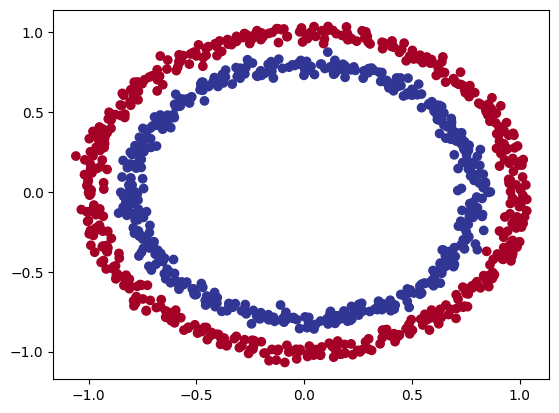

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


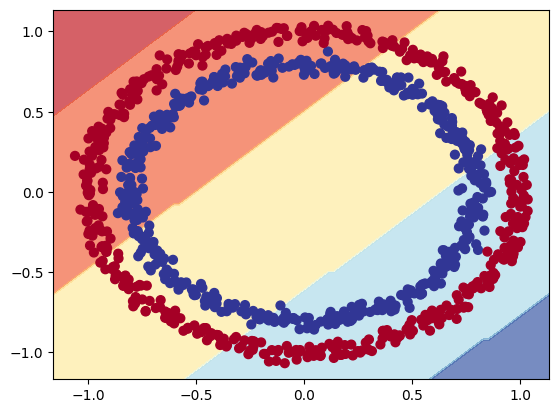

In [ ]:
plot_decision_boundary(model_4, X, y)

###Non-linear activation function

In [ ]:
tf.random.set_seed(42)

model_5 = tf.keras.Sequential([
  tf.keras.layers.Dense(1, activation=tf.keras.activations.relu)
])

model_5.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

history = model_5.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 4.2620 - accuracy: 0.4300
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 4.2031 - accuracy: 0.4430
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1361 - accuracy: 0.4440
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1153 - accuracy: 0.4440
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 4.0894 - accuracy: 0.4440
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 4.0608 - accuracy: 0.4410
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 4.0422 - accuracy: 0.4420
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 4.0036 - accuracy: 0.4420
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 3.9949 - accuracy: 0.4440
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 3.9511 - accuracy: 0.4420
Epoch 11/

In [ ]:
tf.random.set_seed(42)

model_6 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu)
])

model_6.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

history = model_6.fit(X, y, epochs=250)

Epoch 1/250
32/32 [==============================] - 1s 2ms/step - loss: 3.5880 - accuracy: 0.2160
Epoch 2/250
32/32 [==============================] - 0s 2ms/step - loss: 3.3098 - accuracy: 0.2180
Epoch 3/250
32/32 [==============================] - 0s 2ms/step - loss: 3.0681 - accuracy: 0.2190
Epoch 4/250
32/32 [==============================] - 0s 2ms/step - loss: 2.9518 - accuracy: 0.2170
Epoch 5/250
32/32 [==============================] - 0s 2ms/step - loss: 2.6959 - accuracy: 0.2110
Epoch 6/250
32/32 [==============================] - 0s 2ms/step - loss: 2.4294 - accuracy: 0.2060
Epoch 7/250
32/32 [==============================] - 0s 2ms/step - loss: 1.9699 - accuracy: 0.1990
Epoch 8/250
32/32 [==============================] - 0s 2ms/step - loss: 1.6899 - accuracy: 0.1990
Epoch 9/250
32/32 [==============================] - 0s 2ms/step - loss: 1.6363 - accuracy: 0.1980
Epoch 10/250
32/32 [==============================] - 0s 2ms/step - loss: 1.5834 - accuracy: 0.1960
Epoch 11/

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model_7 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 1, ReLU activation
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 2, ReLU activation
  tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid) # ouput layer, sigmoid activation
])

# Compile the model
model_7.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model
history = model_7.fit(X, y, epochs=200, verbose=0)

In [ ]:
model_7.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.1086 - accuracy: 0.9780


[0.10860836505889893, 0.9779999852180481]

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


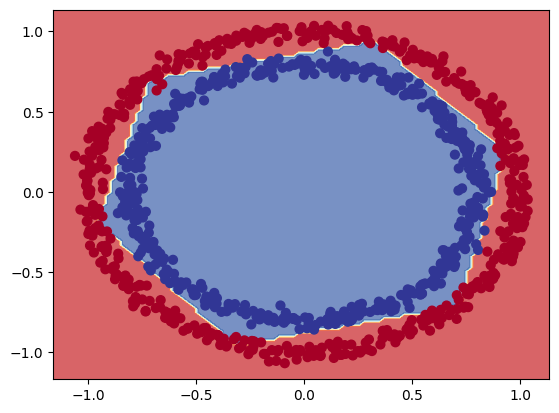

In [ ]:
plot_decision_boundary(model_7, X, y)

In [ ]:
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

In [ ]:
def sigmoid(x):
  return 1 / (1 + tf.exp(-x))

sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

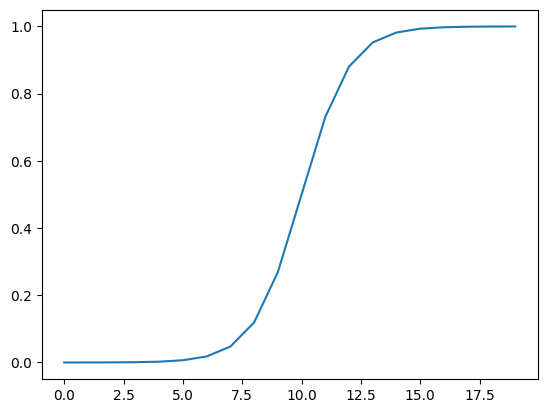

In [ ]:
plt.plot(sigmoid(A))

In [ ]:
def relu(x):
  return tf.maximum(0, x)

relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

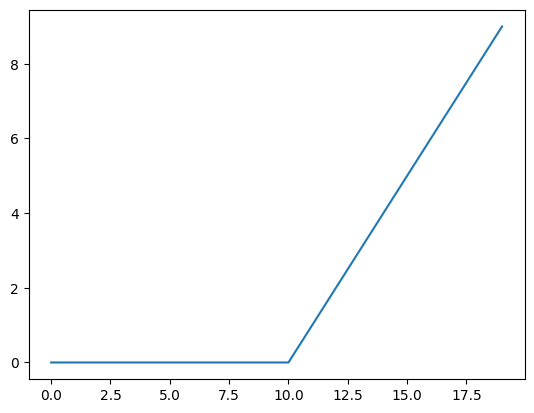

In [ ]:
plt.plot(relu(A))

In [ ]:
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

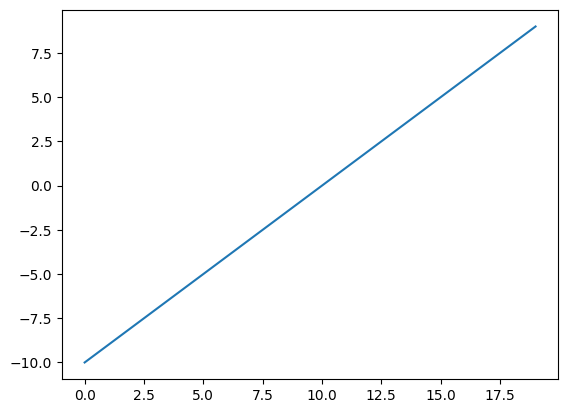

In [ ]:
plt.plot(tf.keras.activations.linear(A))

###Evaluating and improving classification

In [ ]:
X_train, y_train = X[:800],y[:800]
X_test, y_test = X[800:], y[800:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create the model (same as model_7)
model_8 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"), # hidden layer 1, using "relu" for activation (same as tf.keras.activations.relu)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid") # output layer, using 'sigmoid' for the output
])

# Compile the model
model_8.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), # increase learning rate from 0.001 to 0.01 for faster learning
                metrics=['accuracy'])

# Fit the model
history = model_8.fit(X_train, y_train, epochs=25)

Epoch 1/25
25/25 [==============================] - 1s 4ms/step - loss: 0.7170 - accuracy: 0.4850
Epoch 2/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6964 - accuracy: 0.4025
Epoch 3/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6903 - accuracy: 0.4675
Epoch 4/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6869 - accuracy: 0.5263
Epoch 5/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6852 - accuracy: 0.5275
Epoch 6/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6834 - accuracy: 0.5263
Epoch 7/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6804 - accuracy: 0.5325
Epoch 8/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6815 - accuracy: 0.5275
Epoch 9/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6775 - accuracy: 0.5512
Epoch 10/25
25/25 [==============================] - 0s 4ms/step - loss: 0.6749 - accuracy: 0.5450
Epoch 11/25
25/25 [

In [ ]:
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.6632 - accuracy: 0.5500


[0.6632483601570129, 0.550000011920929]

313/313 [==============================] - 1s 1ms/step
doing binary classifcation...
313/313 [==============================] - 0s 2ms/step
doing binary classifcation...


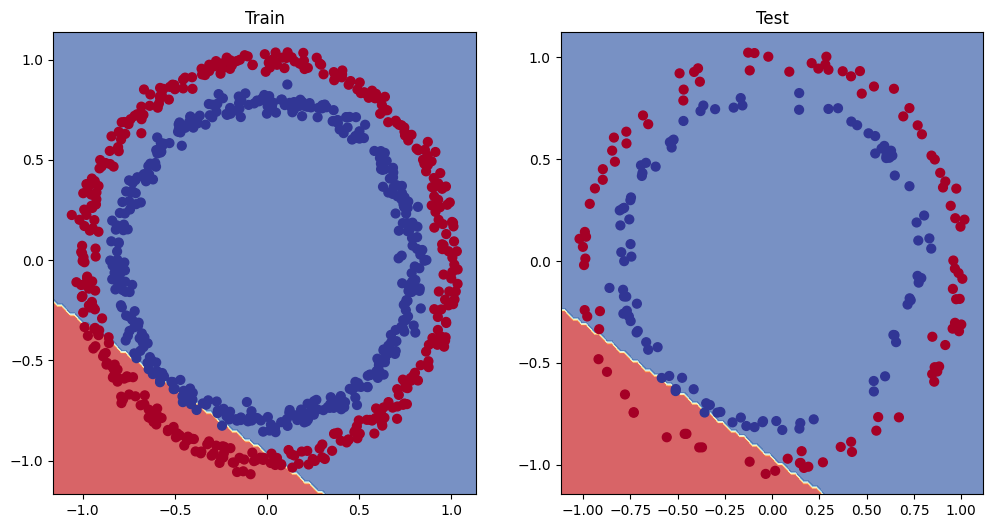

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_8, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_8, X_test, y_test)
plt.show();

###PLot the loss(or training) curves

In [ ]:
pd.DataFrame(history.history)

,loss,accuracy
0,0.716999,0.48500
1,0.696420,0.40250
2,0.690272,0.46750
3,0.686908,0.52625
4,0.685250,0.52750
5,0.683362,0.52625
6,0.680365,0.53250
7,0.681459,0.52750
8,0.677545,0.55125
9,0.674871,0.54500


Text(0.5, 1.0, 'Model_8 loss curves')

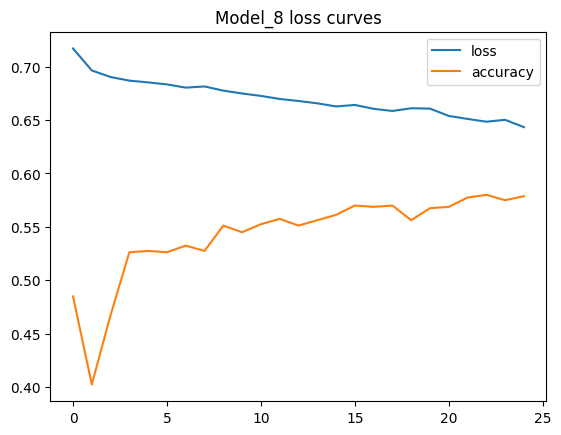

In [ ]:
pd.DataFrame(history.history).plot()
plt.title("Model_8 loss curves")


###Finding best learning rate

to find ideal learning rate where loss decreases the most during training

* learning rate callback - extra piece of functionality
* modified loss curve

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model (same as model_8)
model_9 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_9.compile(loss="binary_crossentropy", # we can use strings here too
              optimizer="Adam", # same as tf.keras.optimizers.Adam() with default settings
              metrics=["accuracy"])

# Create a learning rate scheduler callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20)) # traverse a set of learning rate values starting from 1e-4, increasing by 10**(epoch/20) every epoch

# Fit the model (passing the lr_scheduler callback)
history_9 = model_9.fit(X_train,
                      y_train,
                      epochs=100,
                      callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 0.7001 - accuracy: 0.5250 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6999 - accuracy: 0.5263 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6997 - accuracy: 0.5238 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6995 - accuracy: 0.5225 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6992 - accuracy: 0.5138 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6990 - accuracy: 0.5163 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6987 - accuracy: 0.5050 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6984 - accuracy: 0.5063 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss:

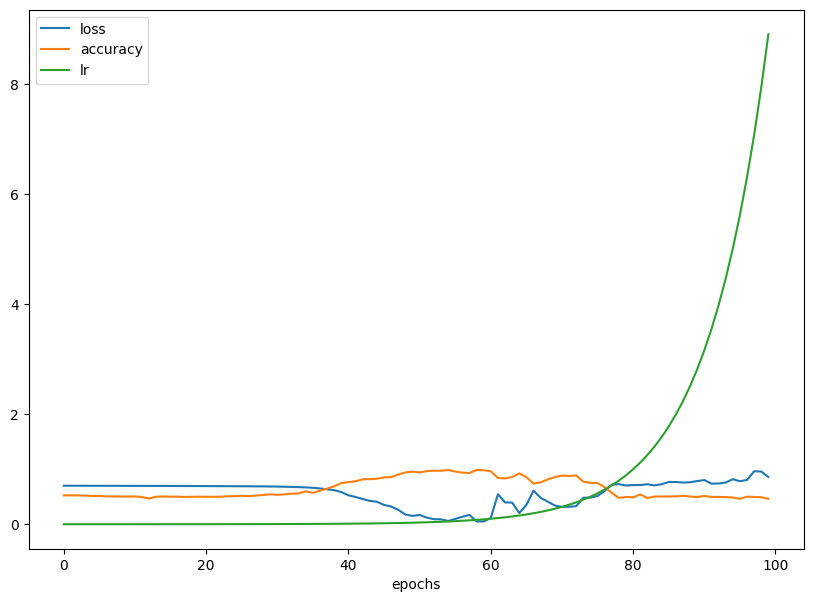

In [ ]:
pd.DataFrame(history_9.history).plot(figsize=(10, 7), xlabel="epochs");

Text(0.5, 1.0, 'Learning rate vs. Loss')

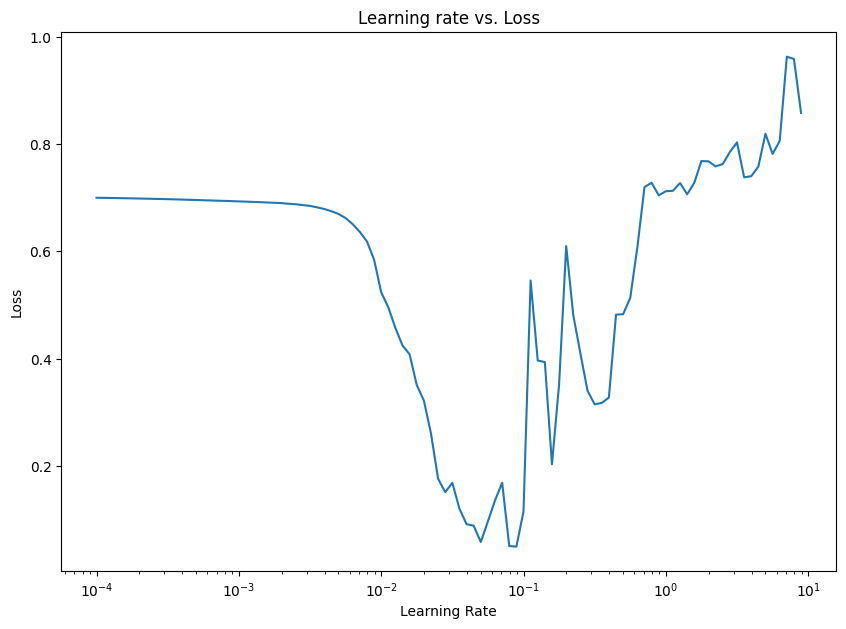

In [ ]:
lrs = 1e-4 * (10 ** (tf.range(100)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history_9.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. Loss")

In [ ]:
len(lrs)

100

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# Create the model
model_10 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model with the ideal learning rate
model_10.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.02), # to adjust the learning rate, you need to use tf.keras.optimizers.Adam (not "adam")
                metrics=["accuracy"])

# Fit the model for 20 epochs (5 less than before)
history_10 = model_10.fit(X_train, y_train, epochs=20)

Epoch 1/20
25/25 [==============================] - 1s 2ms/step - loss: 0.6853 - accuracy: 0.5612
Epoch 2/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6726 - accuracy: 0.5838
Epoch 3/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6520 - accuracy: 0.6087
Epoch 4/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6215 - accuracy: 0.6725
Epoch 5/20
25/25 [==============================] - 0s 2ms/step - loss: 0.5704 - accuracy: 0.7325
Epoch 6/20
25/25 [==============================] - 0s 2ms/step - loss: 0.5109 - accuracy: 0.7912
Epoch 7/20
25/25 [==============================] - 0s 2ms/step - loss: 0.4706 - accuracy: 0.8050
Epoch 8/20
25/25 [==============================] - 0s 3ms/step - loss: 0.4194 - accuracy: 0.8363
Epoch 9/20
25/25 [==============================] - 0s 2ms/step - loss: 0.3750 - accuracy: 0.8712
Epoch 10/20
25/25 [==============================] - 0s 2ms/step - loss: 0.2414 - accuracy: 0.9575
Epoch 11/20
25/25 [

In [ ]:
model_10.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0606 - accuracy: 0.9800


[0.060585662722587585, 0.9800000190734863]

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...
313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


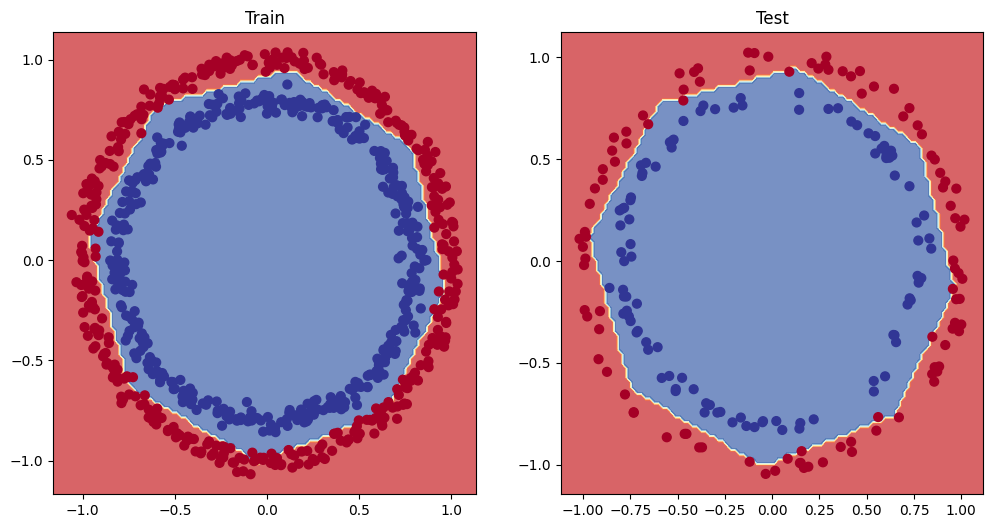

In [ ]:

# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_10, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_10, X=X_test, y=y_test)
plt.show()

from tensorflow.python.ops.gen_nn_ops import softmax_cross_entropy_with_logits_eager_fallback
###More classification evaluation methods

* Accuracy
* Precision
* Recall
* F-1 score
* Confusion matrix
* classification report scikit-learn

In [ ]:
loss, accuracy = model_10.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {(accuracy*100):.2f}%")

7/7 [==============================] - 0s 2ms/step - loss: 0.0606 - accuracy: 0.9800
Model loss on the test set: 0.060585662722587585
Model accuracy on the test set: 98.00%


In [ ]:
from sklearn.metrics import confusion_matrix

y_preds = model_10.predict(X_test)

confusion_matrix(y_test, tf.round(y_preds))

7/7 [==============================] - 0s 2ms/step


array([[97,  4],
       [ 0, 99]])

Pretify confusion matrix

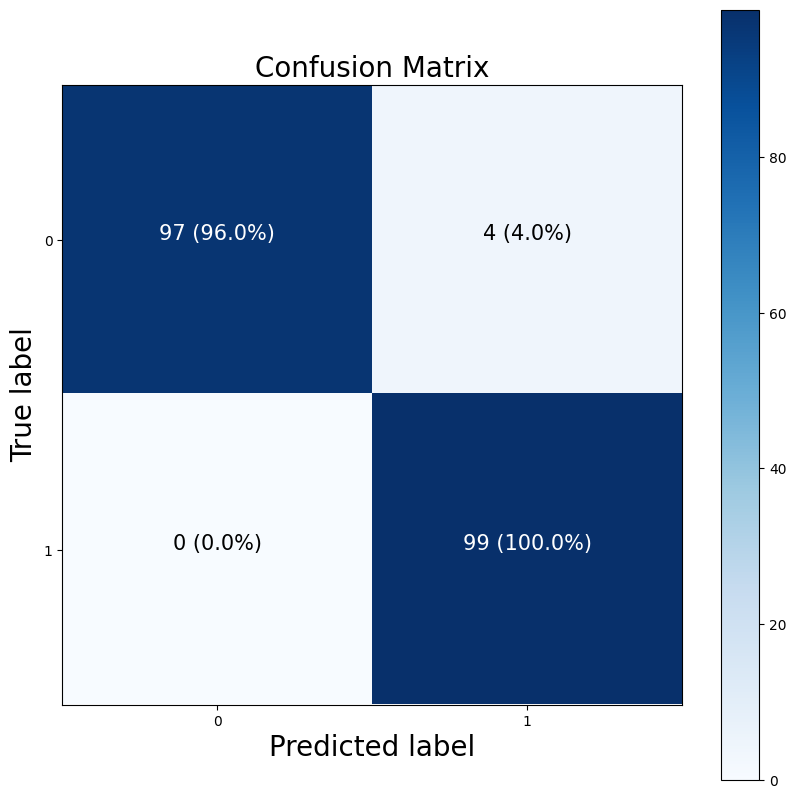

In [ ]:
import itertools

figsize = (10, 10)

cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
n_classes = cm.shape[0]

fig, ax = plt.subplots(figsize=figsize)
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

classes = False

if classes:
  labels= classes
else:
  labels = np.arange(cm.shape[0])

ax.set(title="Confusion Matrix",
       xlabel="Predicted label",
       ylabel="True label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.title.set_size(20)

threshold = (cm.max() + cm.min()) / 2.

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=15)

###Larger example (Multiclass classification)

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [ ]:
print(f"Training sample: \n{train_data[0]}\n")
print(f"Training label:\n{train_labels[0]}\n")

Training sample: 
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1 

In [ ]:
train_data[0].shape, train_labels[0].shape

((28, 28), ())

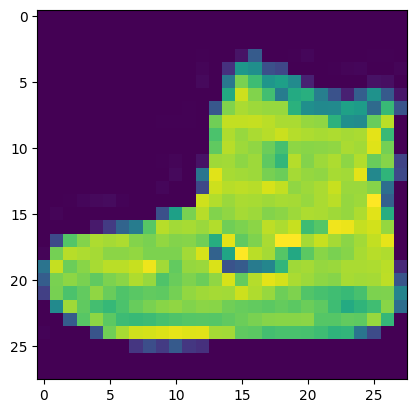

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(train_data[0]);

In [ ]:
train_labels[0]

9

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
len(class_names)


10

Text(0.5, 1.0, 'T-shirt/top')

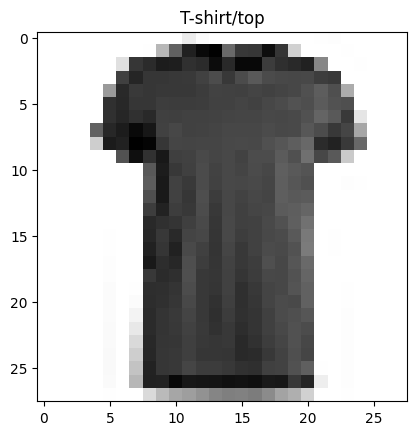

In [ ]:
index_of_choice = 17
plt.imshow(train_data[index_of_choice], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])

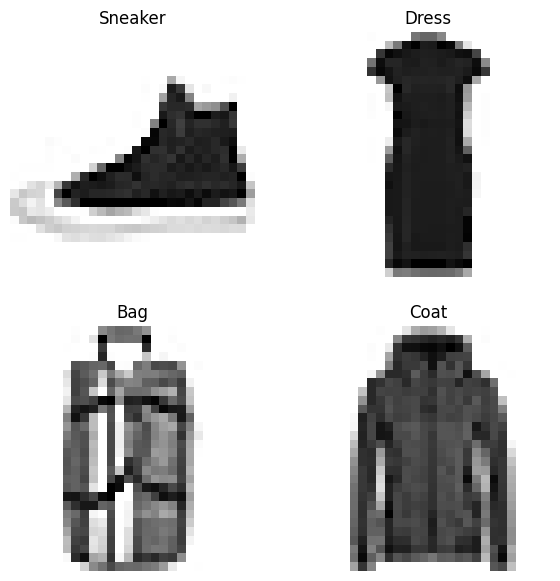

In [ ]:
import random
plt.figure(figsize=(7, 7))
for i in range(4):
  ax = plt.subplot(2, 2, i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

##building a multiclass classification model

similar architecture as binary
* input shape = 28 x 28 shape of one image
* output shape = 10 one per class of clothing
* loss function = tf.keras.losses.CategoricalCrossEntropy()
* ouput layer activation = Softmax

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_11 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784, the Flatten layer does this for us)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_11.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), # different loss function for multiclass classifcation
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
non_norm_history = model_11.fit(train_data,
                                train_labels,
                                epochs=10,
                                validation_data=(test_data, test_labels)) # see how the model performs on the test set during training


Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3986 - accuracy: 0.1186 - val_loss: 2.2387 - val_accuracy: 0.1270
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.1569 - accuracy: 0.1561 - val_loss: 1.9201 - val_accuracy: 0.1896
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.7950 - accuracy: 0.2247 - val_loss: 1.7147 - val_accuracy: 0.2766
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.6898 - accuracy: 0.2774 - val_loss: 1.6623 - val_accuracy: 0.2824
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6459 - accuracy: 0.2909 - val_loss: 1.6230 - val_accuracy: 0.2955
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.6203 - accuracy: 0.2961 - val_loss: 1.6028 - val_accuracy: 0.3147
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.6033 - accuracy: 0.3008 - val_loss: 1.5993 - val_accuracy:

In [ ]:
model_11.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_59 (Dense)            (None, 4)                 3140      
                                                                 
 dense_60 (Dense)            (None, 4)                 20        
                                                                 
 dense_61 (Dense)            (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
train_data.min(), train_data.max()

(0, 255)

Neural networks prefer data to be scaled( or normalized) they like numbers in between 0 and 1

In [ ]:
#divide by maximum to get value in between 0 and 1
train_data_norm = train_data /255.0
test_data_norm = test_data / 255.0

train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [ ]:
#data is normalized find a model
# Set random seed
tf.random.set_seed(42)

# Create the model
model_12 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784, the Flatten layer does this for us)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), # different loss function for multiclass classifcation
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
norm_history = model_12.fit(train_data_norm,
                                train_labels,
                                epochs=10,
                                validation_data=(test_data_norm, test_labels)) # see how the model performs on the test set during training


Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.4646 - accuracy: 0.4390 - val_loss: 1.0383 - val_accuracy: 0.6331
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8235 - accuracy: 0.7265 - val_loss: 0.7345 - val_accuracy: 0.7491
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6739 - accuracy: 0.7652 - val_loss: 0.6600 - val_accuracy: 0.7698
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6228 - accuracy: 0.7782 - val_loss: 0.6215 - val_accuracy: 0.7793
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5911 - accuracy: 0.7891 - val_loss: 0.6015 - val_accuracy: 0.7843
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5690 - accuracy: 0.7992 - val_loss: 0.6077 - val_accuracy: 0.7885
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5498 - accuracy: 0.8098 - val_loss: 0.5995 - val_accuracy:

<Axes: title={'center': 'Normalized Data'}>

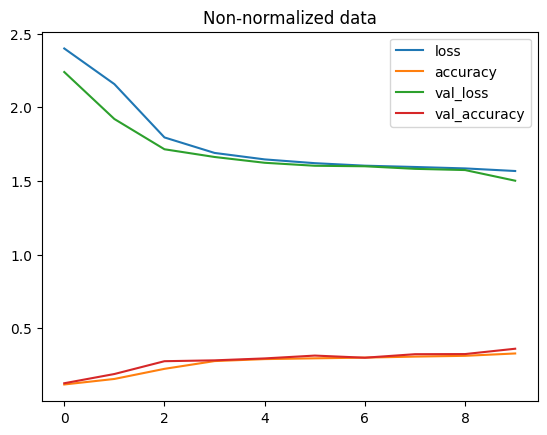

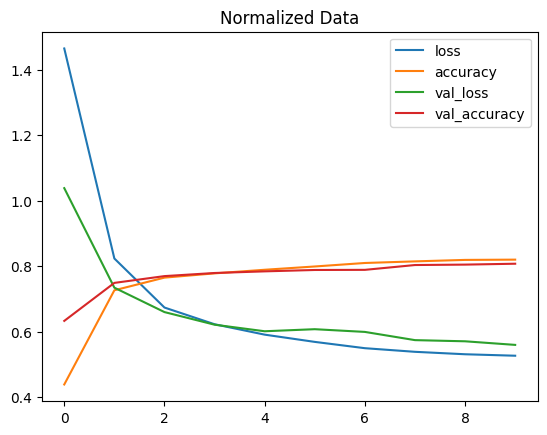

In [ ]:
import pandas as pd
pd.DataFrame(non_norm_history.history).plot(title="Non-normalized data")
pd.DataFrame(norm_history.history).plot(title="Normalized Data")

###Finding ideal learning rate

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_13 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# Fit the model
find_lr_history = model_13.fit(train_data,
                               train_labels,
                               epochs=40, # model already doing pretty good with current LR, probably don't need 100 epochs
                               validation_data=(test_data, test_labels),
                               callbacks=[lr_scheduler])


Epoch 1/40
1875/1875 [==============================] - 5s 2ms/step - loss: 2.4324 - accuracy: 0.0977 - val_loss: 2.3019 - val_accuracy: 0.1000 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 5s 2ms/step - loss: 2.2824 - accuracy: 0.1091 - val_loss: 2.2332 - val_accuracy: 0.1312 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 4s 2ms/step - loss: 2.2298 - accuracy: 0.1333 - val_loss: 2.2114 - val_accuracy: 0.1393 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 4s 2ms/step - loss: 2.0600 - accuracy: 0.1846 - val_loss: 1.7965 - val_accuracy: 0.2320 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 5s 3ms/step - loss: 1.7034 - accuracy: 0.2541 - val_loss: 1.6064 - val_accuracy: 0.2998 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5632 - accuracy: 0.3222 - val_loss: 1.5296 - val_accuracy: 0.3239 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 4s

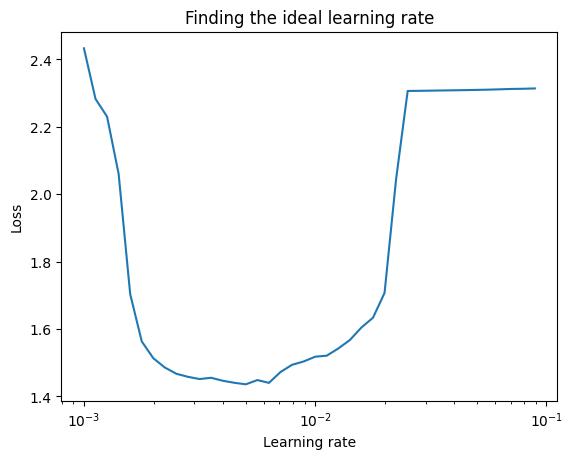

In [ ]:

# Plot the learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt
lrs = 1e-3 * (10**(np.arange(40)/20))
plt.semilogx(lrs, find_lr_history.history["loss"]) # want the x-axis to be log-scale
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate");


In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_14 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), # ideal learning rate (same as default)
                 metrics=["accuracy"])

# Fit the model
history_14 = model_14.fit(train_data_norm,
                       train_labels,
                       epochs=20,
                       validation_data=(test_data_norm, test_labels))

Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 1.3303 - accuracy: 0.5189 - val_loss: 0.7824 - val_accuracy: 0.6981
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6959 - accuracy: 0.7462 - val_loss: 0.6694 - val_accuracy: 0.7635
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6213 - accuracy: 0.7734 - val_loss: 0.6327 - val_accuracy: 0.7600
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5935 - accuracy: 0.7830 - val_loss: 0.6059 - val_accuracy: 0.7769
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5802 - accuracy: 0.7867 - val_loss: 0.6130 - val_accuracy: 0.7748
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5695 - accuracy: 0.7906 - val_loss: 0.6159 - val_accuracy: 0.7744
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5640 - accuracy: 0.7914 - val_loss: 0.6136 - val_accuracy:

###Evaluating our multi-class classification model

* evaluate its performance using other classification metrics
* assess some of the predictions
* improve its result
* save and export

In [ ]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
import itertools
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).

  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes),
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)

  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)


In [ ]:
y_probs = model_14.predict(test_data_norm)
y_probs[:5]

313/313 [==============================] - 1s 2ms/step


array([[8.35903193e-05, 6.34399000e-12, 8.85506708e-08, 9.75337480e-06,
        7.74914188e-10, 2.17861563e-01, 1.20548520e-05, 1.60605967e-01,
        7.75052176e-05, 6.21349394e-01],
       [9.33299831e-04, 2.80569643e-12, 7.84052849e-01, 5.10343227e-07,
        8.21560342e-03, 1.38547640e-33, 2.06796989e-01, 0.00000000e+00,
        8.31470629e-07, 0.00000000e+00],
       [1.39028634e-06, 9.95832741e-01, 6.11311407e-06, 4.03223606e-03,
        1.27147810e-04, 9.92684167e-17, 4.37640750e-07, 3.72795867e-32,
        1.39207180e-14, 0.00000000e+00],
       [8.61257590e-08, 9.97887552e-01, 6.99513905e-08, 2.11082911e-03,
        1.52155599e-06, 2.83983402e-15, 5.01265118e-09, 1.14682661e-32,
        3.20414531e-17, 0.00000000e+00],
       [1.30402237e-01, 1.12419275e-05, 1.89827532e-01, 1.94354281e-02,
        2.84406543e-02, 1.67413618e-11, 6.28723741e-01, 9.49039431e-16,
        3.15931626e-03, 5.43220322e-34]], dtype=float32)

In [ ]:
test_data[:10], test_data_norm[:10]

(array([[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        ...,
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],

In [ ]:
y_probs[0], tf.argmax(y_probs[0]), class_names[tf.argmax(y_probs[0])]

(array([8.3590319e-05, 6.3439900e-12, 8.8550671e-08, 9.7533748e-06,
        7.7491419e-10, 2.1786156e-01, 1.2054852e-05, 1.6060597e-01,
        7.7505218e-05, 6.2134939e-01], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=9>,
 'Ankle boot')

In [ ]:
y_preds = y_probs.argmax(axis=1)
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [ ]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test_labels, y_preds)

array([[669,   1,   9, 112,  10,   4, 183,   0,  12,   0],
       [  1, 950,   1,  31,  11,   0,   5,   0,   1,   0],
       [  9,   7, 435,  16, 293,   0, 233,   0,   7,   0],
       [ 26,  21,  11, 838,  41,   1,  55,   0,   7,   0],
       [  0,   6,  46,  24, 845,   0,  72,   0,   7,   0],
       [  0,   0,   0,   1,   0, 924,   0,  38,   8,  29],
       [113,   3,  77,  66, 202,   1, 505,   0,  33,   0],
       [  0,   0,   0,   0,   0,  44,   0, 932,   4,  20],
       [  7,   2,   1,   5,   9,   8,  29,   3, 936,   0],
       [  1,   0,   0,   0,   0,  24,   0,  66,   0, 909]])

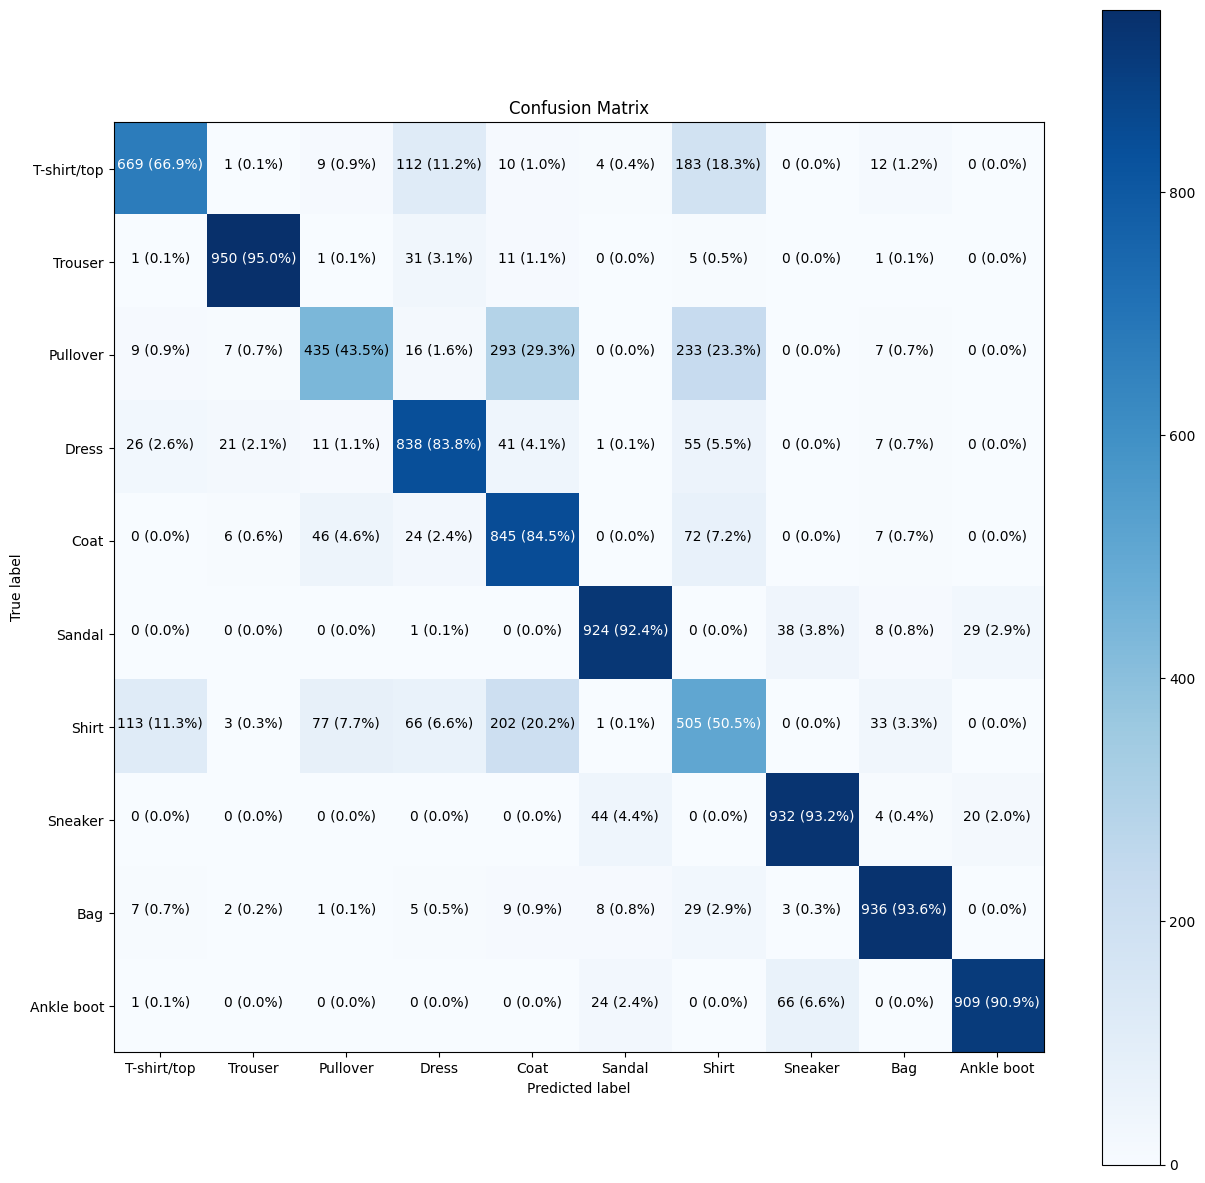

In [ ]:
make_confusion_matrix(test_labels, y_preds, class_names, figsize=(15, 15), text_size=10)

In [ ]:

import random

# Create a function for plotting a random image along with its prediction
def plot_random_image(model, images, true_labels, classes):
  """Picks a random image, plots it and labels it with a predicted and truth label.

  Args:
    model: a trained model (trained on data similar to what's in images).
    images: a set of random images (in tensor form).
    true_labels: array of ground truth labels for images.
    classes: array of class names for images.

  Returns:
    A plot of a random image from `images` with a predicted class label from `model`
    as well as the truth class label from `true_labels`.
  """
  # Setup random integer
  i = random.randint(0, len(images))

  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28)) # have to reshape to get into right size for model
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the target image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel information (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color) # set the color to green or red

1/1 [==============================] - 0s 22ms/step


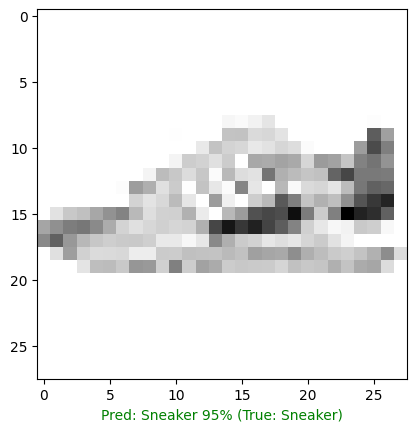

In [ ]:
# Check out a random image as well as its prediction
plot_random_image(model=model_14,
                  images=test_data_norm,
                  true_labels=test_labels,
                  classes=class_names)